In [24]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 1

In [25]:
import numpy as np
import matplotlib.pyplot as plt

Describe the steps required for performing PCA.

1. Center (or standardize) the data: move to a dataset where each feature has zero mean (and unit variance if standardized);
2. Compute the covariance matrix of the centered (standardized) data: $$ S = \frac{A^TA}{n-1}$$ with $n$ number of samples;
3. Find eigenvectors and eigenvalues of the covariance matrix: $S$ is symmetric, so it can be diagonalized $$S = VDV^T$$ Eigenvectors are in matrix $W$ and represent the principal components (direction of maximum variance), and the eigenvalues are in the diagonal matrix $D$ and indicate the amount of variance explained by each principal component (the magnitude of the variance).

    Eigenvectors are all orthogonal to each other, and the corresponding eigenvalues are sorted in descending order;
4. Project the data onto the new feature space: principal components for the data are given by $AV$.

    The new features will be a linear combination of the original features. The projection matrix is obtained by stacking the eigenvectores corresponding to the selected principal components (i.e., the ones that together explain the majority of the variance in the dataset). The new dataset is obtained by multiplying the standardized data by the projection matrix.

How SVD can be used within this process?


The SVD can be used in this process by modifying a little bit the steps:
- Instead of computing the covariance matrix of the centered (standardized) data, apply the SVD decomposition on it: $$A = U\Sigma V^T$$
 Matrix $U$ contains the left singular vectors, matrix $V^T$ contains the right singular vectors, while matrix $\Sigma$ is diagonal and contains the singular values.
 We can easily see that $$S = \frac{1}{n-1}V\Sigma U^TU\Sigma V^T = \frac{1}{n-1}V\Sigma^2V^T$$ so right singular vectors $V$ are principal components and singular values are related to eigenvalues of the covariance matrix by $\lambda _i = \frac{\sigma _i ^2}{n-1} $ .
- Principal components are then obtained by multiplying $AV = U\Sigma V^TV = U\Sigma$

Suppose you perform PCA on a 2D dataset and it yields 2 eigenvalues which are equal. Whatdoes it mean concerning the importance of the dimension?

The eigenvalues obtained from the covariance matrix represent the amount of variance explained by each principal component: if the two eigenvalues obtained are the same, it means that both dimensions carry an equal amount of importance (or both contribute equally to the variability in the data).

This result suggest that there is no dominan direction or axis along which data is spread: data is equally spread out in both dimentions.

Would pursuing a dimensionality reduction be a good choice? Why?

Practically, this means that reducing the dimensionality of the dataset by dropping one of the dimensions would not result in significant loss of information since both contribute equally, but this of course depend by the dataset under study.

Draw a dataset with two eigenvalues of the same size.

Eigenvalues:

 [2.84327178 3.01141811]


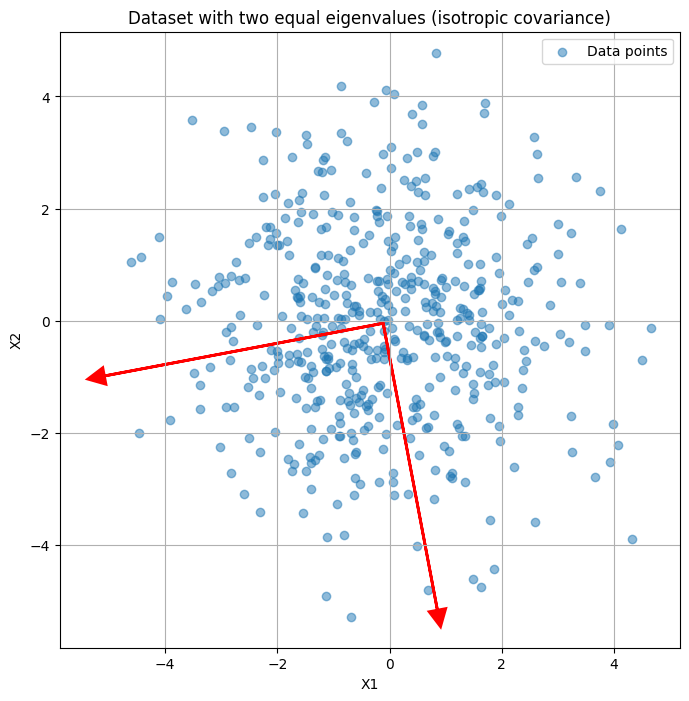

In [26]:
# Generate isotropic Gaussian data (equal variance along both axes)
np.random.seed(0)
num_points = 500

# Covariance matrix with equal eigenvalues (identity matrix scaled)
cov = np.array([[3, 0],
                [0, 3]])

# Generate data centered at zero with this covariance
data = np.random.multivariate_normal(mean=[0, 0], cov=cov, size=num_points)

# Compute covariance and eigenvalues for verification
cov_matrix = np.cov(data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:", eigenvalues)

# Plot the data points
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Data points')

# Plot eigenvectors scaled by eigenvalues
origin = np.mean(data, axis=0)
for i in range(2):
    vec = eigenvectors[:, i] * np.sqrt(eigenvalues[i]) * 3  # scale for visualization
    plt.arrow(origin[0], origin[1], vec[0], vec[1],
              head_width=0.3, head_length=0.3, fc='r', ec='r', linewidth=2)

plt.title("Dataset with two equal eigenvalues (isotropic covariance)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
# Performing Eigenvalue decomposition on the covariance matrix to get eigenvalues
cov_matrix = np.cov(data.T)
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Sorting the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
first_two_eigenvalues = sorted_eigenvalues[:2]

print("First two eigenvalues of the covariance matrix:", first_two_eigenvalues)

First two eigenvalues of the covariance matrix: [3.01141811 2.84327178]


Suppose now you have performed a PCA on a 2D dataset and you get the eigenvalues 6 and 2. Draw a distribution of sample points that may give rise to this results. Also draw the eigenvectors.

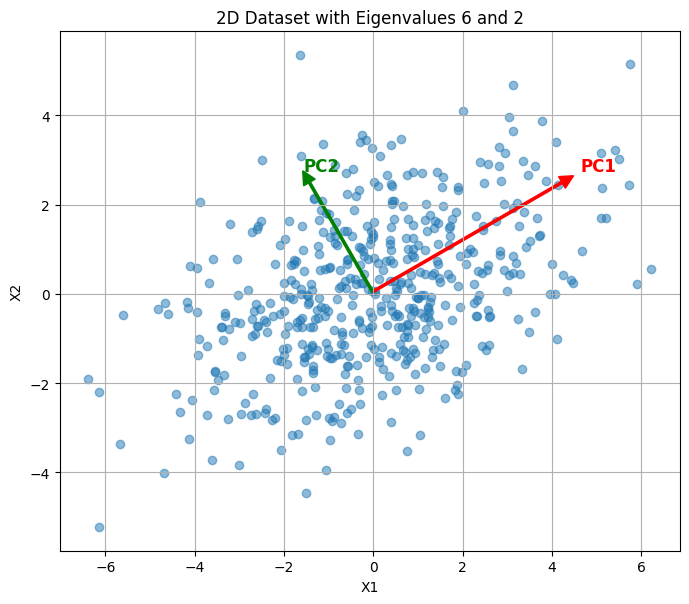

In [28]:
# Set the eigenvalues
eigenvalues = np.array([6, 2])

# Set the corresponding eigenvectors (example)
eigenvectors = np.array([[np.sqrt(3)/2, -0.5],
                         [0.5, np.sqrt(3)/2]])

# Generate random points
np.random.seed(42)
num_points = 500
X = np.random.randn(num_points, 2)

# Scale the points by the eigenvalues
X = X @ np.diag(np.sqrt(eigenvalues))

# Rotate the points using the eigenvectors
X = X @ eigenvectors.T

# Plot the points
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

# Plot the eigenvectors with labels
origin = np.mean(X, axis=0)
for i in range(2):
    vec = eigenvectors[:, i] * np.sqrt(eigenvalues[i]) * 2  # scale factor for visibility
    plt.arrow(origin[0], origin[1], vec[0], vec[1],
              color=['r', 'g'][i], width=0.05, head_width=0.3, head_length=0.3)
    plt.text(origin[0] + vec[0]*1.1, origin[1] + vec[1]*1.1, f'PC{i+1}',
             color=['r', 'g'][i], fontsize=12, fontweight='bold')

plt.title('2D Dataset with Eigenvalues 6 and 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()


Consider the following 3 data points in the 2D space: $(−1, 1),(0, 0)$ and $(1, 1)$. What’s the first principal component of the given dataset ?

In [29]:
# Define the data points
X = np.array([
    [-1, 1],
    [0, 0],
    [1, 1]
])

# Step 1: Center the data (subtract mean)
X_centered = X - X.mean(axis=0)

# Step 2: Compute covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # eigh for symmetric matrices

# Step 4: Get the principal component (eigenvector with largest eigenvalue)
idx_max = np.argmax(eigenvalues)
first_pc = eigenvectors[:, idx_max]

print("Covariance matrix:\n", cov_matrix)
print("Eigenvalues:", eigenvalues)
print("First principal component (unit vector):", first_pc)


Covariance matrix:
 [[1.         0.        ]
 [0.         0.33333333]]
Eigenvalues: [0.33333333 1.        ]
First principal component (unit vector): [1. 0.]


If you project the original data points onto the 1D subspace spanned by the principal component, what are their coordinates in this subspace? What is the variance of the projected data?

In [30]:
# Original data points
X = np.array([
    [-1, 1],
    [0, 0],
    [1, 1]
])

# Step 1: Center the data
X_centered = X - X.mean(axis=0)

# First principal component (from previous calculation)
first_pc = np.array([1, 0])  # unit vector along x-axis

# Step 2: Project centered data onto the first principal component
projections = X_centered @ first_pc  # dot product

# Step 3: Calculate variance of projected data
variance_proj = np.var(projections, ddof=1)  # ddof=1 for sample variance

print("Projected coordinates:", projections)
print("Variance of projected data:", variance_proj)

Projected coordinates: [-1.  0.  1.]
Variance of projected data: 1.0


If you represent the projected data in the original 2D space and consider them as the reconstruction of the original data points, what is the reconstruction error? Compute the reconstruction of the points.

In [31]:
# Original data points
X = np.array([
    [-1, 1],
    [0, 0],
    [1, 1]
])

# Compute mean of original data
mean_X = X.mean(axis=0)

# Center data
X_centered = X - mean_X

# First principal component (unit vector)
first_pc = np.array([1, 0])  # from previous calculations

# Project centered data onto first PC
projections = X_centered @ first_pc

# Reconstruct centered data from projections
X_reconstructed_centered = np.outer(projections, first_pc)

# Reconstruct original data by adding the mean back
X_reconstructed = X_reconstructed_centered + mean_X

# Compute reconstruction error (mean squared error)
errors = X - X_reconstructed
mse = np.mean(np.sum(errors**2, axis=1))

print("Reconstructed points:\n", X_reconstructed)
print("Mean squared reconstruction error:", mse)


Reconstructed points:
 [[-1.          0.66666667]
 [ 0.          0.66666667]
 [ 1.          0.66666667]]
Mean squared reconstruction error: 0.22222222222222224


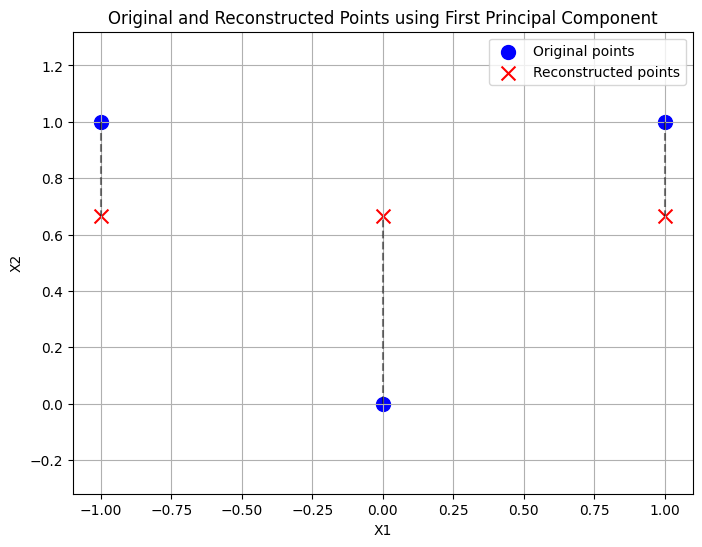

In [32]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Original points', s=100)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='red', marker='x', label='Reconstructed points', s=100)

# Draw lines connecting original points to reconstructions
for orig, rec in zip(X, X_reconstructed):
    plt.plot([orig[0], rec[0]], [orig[1], rec[1]], 'k--', alpha=0.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original and Reconstructed Points using First Principal Component')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Exercise 2

In [33]:
import numpy as np
import jax
import jax.numpy as jnp

Consider the following data:
$$ X = \begin{bmatrix} 1 & 1 & 2 \\ 1 & 2 & 1 \\ 1 & 1 & 1 \end{bmatrix}, \quad y = \begin{bmatrix} 11 \\ 10 \\ 8 \end{bmatrix}$$
where $X$ is the data matrix and $y$ contains the labels.

We want to find the parameter vector
$$\beta = \begin{bmatrix} \beta_1 & \beta_2 & \beta_3 \end{bmatrix}^T$$
that minimizes the loss over all instances $x_i$ (the i-th row of the matrix X):
$$ L(X, \beta, y) = \sum_{i=1}^3(\beta^Tx_i - y_i)^2$$

In [34]:
X = np.array([[1.0, 1.0, 2.0], [1.0, 2.0, 1.0], [1.0, 1.0, 1.0]])
y = np.array([[11.0, 10.0, 8.0]]).T

In [35]:
def loss(X, beta, y):
    return jnp.sum(jnp.square(X @ beta - y))

loss_jit = jax.jit(loss)
dloss_jit = jax.jit(jax.grad(loss, argnums=1))

Explain the differences between the classical gradient method (GD) and the stochastic gradient method (SGD).

The classical GD method is an iterative optimization (minimization/maximization) method that uses the gradient of the function as the direction (for maximization problems, the opposite direction for minimization ones) toward which to update the approximate solution: the gradient is computed by approximating its value by using the whole dataset available at each step.

On the other hand, in the SGD we approximate the gradient by only using a subset of points of the dataset, chosen randomly. It can be proven that the SGD yelds the same results as the classical GD, but is computationally more efficient, since we use less data to approximate the gradient of the function at each step.

There are many types of SGD: with or without replacement of the subset of points of the dataset used at each iteration, using only one point or a batch of points as subset, introducing the "moment" of the iteration, where we also consider the history of the past directions to update the next, and many more.

Perform two epochs using SGD with a step size $\eta = 0.1$ and report the errors and the total loss after each epoch; use the initial guess $\beta = \begin{bmatrix} 1 & 1 & 1 \end{bmatrix}^T$ . (Run through the instances in order instead of performing a random selection.).

In [36]:
# Initialize beta and parameters
beta = np.array([[1.0, 1.0, 1.0]]).T
learning_rate = 0.1
n_epochs = 20

loss_history = []

print('Initial loss: %1.2f' % loss_jit(X, beta, y))

for epoch in range(n_epochs):
    i = epoch % X.shape[0]  # cycling through instances
    
    grad = dloss_jit(X[i], beta, y[i])
    beta -= learning_rate * grad
    
    current_loss = loss_jit(X, beta, y)
    loss_history.append(current_loss)

print('Final loss: %1.2f' % loss_jit(X, beta, y))
print(f'Final beta: {beta}')


Initial loss: 110.00
Final loss: 0.09
Final beta: [[2.2355494]
 [2.2747455]
 [3.2068558]]


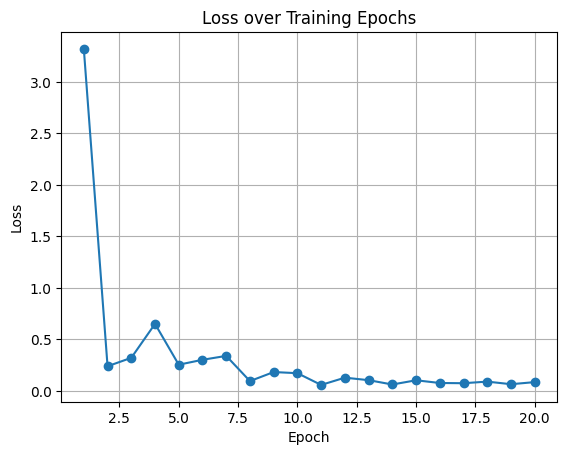

In [37]:
# Plotting the loss history
plt.plot(range(1, n_epochs + 1), loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Training Epochs')
plt.grid(True)
plt.show()

Describe the differences between SGD and ADAGRAD. Do you think ADAGRAD would help in this case?

Stochastic Gradient Descent (SGD) and AdaGrad (Adaptive Gradient Descent) are both optimization algorithms used in training machine learning models, particularly in the context of deep learning. Here are the main differences between SGD and AdaGrad:

1. **Adaptivity to Learning Rates:**
   - **SGD:** Uses a fixed learning rate throughout the training process. This means that the same learning rate is applied to all parameters of the model at each iteration.
   - **AdaGrad:** Adjusts the learning rates for each parameter individually based on their historical gradients. It adapts the learning rate over time, allowing for larger updates for infrequently occurring features and smaller updates for frequently occurring features.

2. **Learning Rate Scaling:**
   - **SGD:** Requires manual tuning of the learning rate, which can be a challenging task. Setting an appropriate learning rate is crucial for convergence and model performance.
   - **AdaGrad:** Automatically scales the learning rates based on the historical sum of squared gradients. This adaptability can be beneficial, especially when dealing with sparse data or features.

3. **Sparse Data Handling:**
   - **SGD:** Performs uniformly across all parameters, regardless of the sparsity of the data.
   - **AdaGrad:** Performs well with sparse data because it individually adapts learning rates for each parameter. Features with rare occurrences get larger updates, helping in their faster convergence.

4. **Memory Requirement:**
   - **SGD:** Requires less memory as it only needs to store and update the current gradients for each parameter.
   - **AdaGrad:** Needs to store the historical sum of squared gradients for each parameter, which can result in higher memory requirements. This can be a drawback for very large-scale models.

5. **Robustness:**
   - **SGD:** Can be more robust when dealing with non-stationary or noisy objectives, as it doesn't rely heavily on past gradients.
   - **AdaGrad:** May struggle with non-convex optimization problems, and its accumulated squared gradients can lead to a diminishing learning rate problem in the long run.

6. **Convergence Speed:**
   - **SGD:** May require careful tuning but can converge faster in some cases, especially when the learning rate is well chosen.
   - **AdaGrad:** Can be more forgiving in terms of learning rate tuning and adapt well to different scales, but it might converge more slowly in some cases.

In summary, while SGD uses a fixed learning rate for all parameters, AdaGrad adapts the learning rates individually based on historical gradients. The adaptability of AdaGrad can be advantageous in certain scenarios, but it may come with higher memory requirements and potential challenges in non-convex optimization problems. The choice between these two algorithms often depends on the specific characteristics of the data and the problem at hand.